# # PARTIE II : CHURN

### Introduction

le jeu de données qui est soumis à notre analyse s'articule autour de la Télécomunication.Il s'agit ici d'un ensemble de données multivariées décrivant l’analyse des désabonnements (signifiant le départ chez les concurrents) des clients d’un opérateur téléphonique.
Dans cette étude, nous procedons rigoureusement à l'apprentissage et la classification des  valeur de résiliation. "chuch" qui consite à dire si Oui le client à quitté l'entreprise ce trimestre ou Non c'est à dire le client est resté dans l'entreprise

## Importation des librairies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Chargement des données

In [5]:
df = pd.read_csv('churn.csv')

In [6]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Exploration des données

Dans cette section, nous aborderons une vue d’ensemble sur les données en mettant en exergue certaines mesures comme la moyenne, l’ecart type, les quartiles, etc. Nous regardons aussi l’existence de valeurs nulles dans l’ensemble de données.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

Le jeu de données présente 7043 instances et 21 colones dont les 2 notamment: SeniorCitizen, tenure, sont des valeurs numeriques (int64), MonthlyCharges (float64) et les 18 sont des objets. On peut également s'apercevoir que le jeu de données ne presente pas de valeurs nulles.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Pour les colonnes SeniorCitizen, tenure, MonthlyCharges  on note une dispersion trés élevée des données par rapport à la moyenne Mean.
- Par rapport aux quartiles, la répartition des données est totalement hétérogène selon les colonnes. En effet, pour la colonne SeniorCitizen, on note plus une repartition homogene des donnees sur q1, q2 et q3 avec une des proportions invariantes et nulles de q1, q2 et q3.
- Par rapport aux colones tenure et MonthlyCharges nous observons une distribution heterogène. En effet, la repartition des données sur les quartiles q1, q2, q3 par rapport à tenure, MonthlyCharges est trés hétérogène par rapport à la moyenne avec une proportion trés élevée entre les moyennes des deux attributs. 
- S'agissant de la moyenne globalement, Il est notable de remarquer l'heterogeneité tres importantes des échelles. En effet, la moyenne des colonnes du dataset sont tres differentes ainsi, un travail de normalisation sera fait pour homogeiniser totalement les echelles.

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


- D'aprés notre matrice de corrélation, nous constatons une forte corrélation entre les colonnes ce qui explique une relation determinant entre ces variables.  

In [9]:
df["gender"].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

- Aprés avoir filtrer notre jeu de données par rapport au genre (gender), nous constatons que qu'il y'a 3555 homme parmi les clients sur 3488 femmes.
- Autrement dit nous avons 50.47% d'hommes et 49.52% de femmes dans notre jeu de données. Ainsi nous pouvons dire que l'entreprise à plus de clients homme que de femmes.

In [10]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Avec les resultats obtenus dans l'étude des charges mensuelles des clients (7043), nous constatons que les clients de l'entreprise ont une charge moyenne des frais estimée à 64.76 euros ou dollars, le minimum de charge mensuelles min à 18.25 et un maximum max des charges mensuelles à 118.75.Pour les quartiles : 25 % des clients de l'entreprise ont une chage mensuelle de 35.50 en moyenne, 50 % des clients ont une charge mensuelle moyenne de 70.35 et 75 % d'entre eux également ont une charge mensuelle éstimée à 89.85.

In [11]:
df["Contract"].unique().tolist()

['Month-to-month', 'One year', 'Two year']

- Ici nous observons que l'entrepise présente trois types de contrat à ses clients notamment: Month-to-month (pour une durée de validité de 1 mois), One-year (pour une durée de validité d'un an) et Two-years(pour une durée de validité de deux ans).

In [12]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

df["InternetService"].value_counts()

Toujours dans l'exploration et la comprehension des données nous constatons que l'entreprise offre deux services d'accés à internet notamment la fibre optic et le DSL.
Ainsi, 3096 clients bénéficient de la fibre optic alors que 2421 clients utilise le service internet DSL. Cependant, 1526 clients ne sont pas abonés à ces services internet.

In [13]:
#reperer les valeur unique de la colonne ciblée
df["Churn"].unique().tolist()

['No', 'Yes']

Par rapport à l'exploration de la variable cible, nous constatons qu'elle composée de deux valeurs distinctes 'No' c'est à dire le client est resté dans l'entreprise et la valeur 'YES' c'est à dire que le client à quité dans l'entreprise.

## Etude de la distribution des données

### Visualisation des données

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

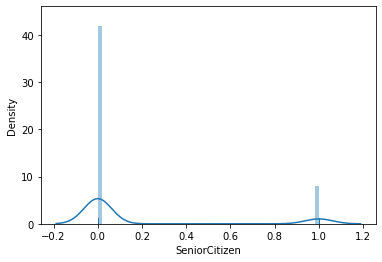

In [14]:
sns.distplot(df.SeniorCitizen, rug=True, hist=True)

- on constate que plus de 40%  des clients ont 65 ans ou plus cependant prés de 10% ont moins de 65 ans 

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

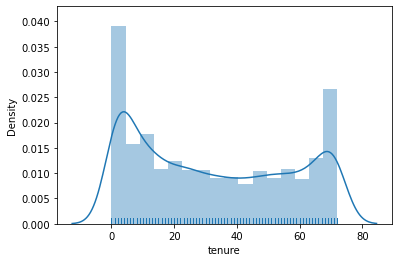

In [15]:
sns.distplot(df.tenure, rug=True, hist=True)

- On constate que la distribution des tenures est asymetrique, et la valeur de tenure Indiquant si le client est abonné à un service téléphonique domestique auprès de l'entreprise  est compris entre 0 et 72 % des clients

C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cheri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

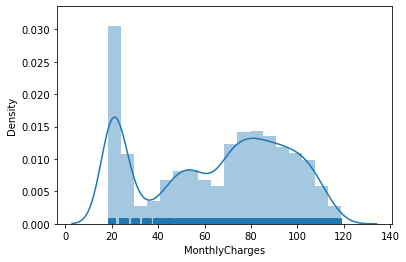

In [16]:
sns.distplot(df.MonthlyCharges, rug=True, hist=True)

- On constate que la distribution des charges mensuelles est asymetriques.

Dans sa globalité la dystribution des données ne suit pas une loi normale ce qui necessitera une standardisation des données avant la mis en place du modèle.

<AxesSubplot:ylabel='MonthlyCharges'>

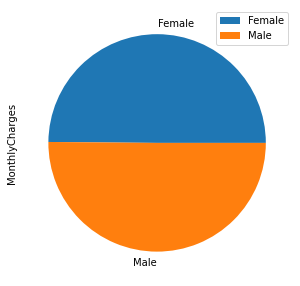

In [17]:
df.groupby("gender")["MonthlyCharges"].sum().plot.pie(legend=True, figsize=(5, 5))

Ici en calculant la charge mensuelle des hommes et des femmes, nous constatons que les proportions de charge sont equi-distribullée entre les clients hommes et femmes.

No     5174
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Churn'>

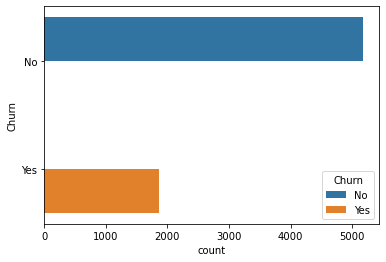

In [18]:
print(df.Churn.value_counts())
sns.countplot(y="Churn", hue="Churn", data=df)

Dans cette representation, nous voyons que dans la variables cibles nous avon une disproportion importante de valeurs entre les clients qui ont quitté l'entreprise représentés par "YES" soit 5174 clients (73.46%) et ceux qui ont décidé de rester dans l'entreprise notés "NON" soit 1869 clients (26.53%).Nous notons ainsi une difference de proportion de 3305 clients soit 46,92 % du total des clients de l'entreprise.

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>, <AxesSubplot:>]],
      dtype=object)

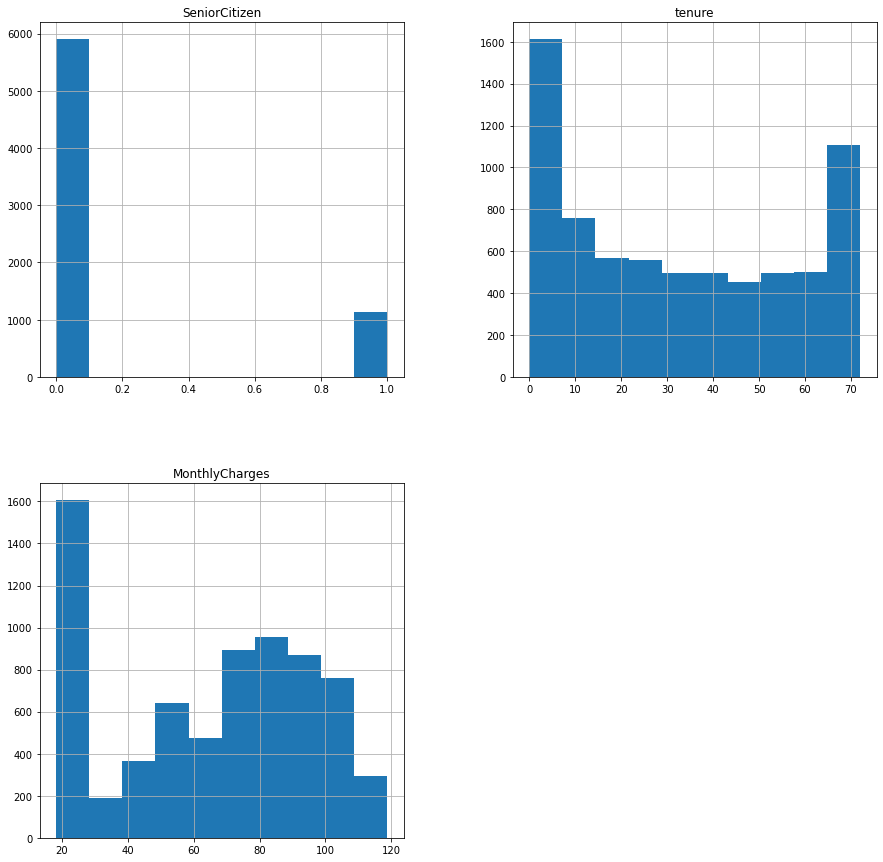

In [19]:
df.hist(bins=10,figsize=(15,15))

Text(0.5, 1.0, 'Phone Service & Internet Service\n ')

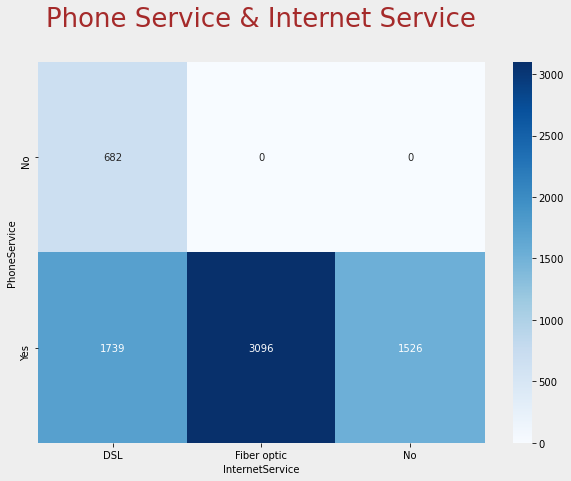

In [20]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(df.PhoneService,df.InternetService),annot=True,fmt="d",cmap="Blues")
plt.title('Phone Service & Internet Service\n ',fontsize=26,color='brown')

- Toujours dans la visualisation des données nous constatons que l'entreprise offre deux services d'accés à internet notamment la fibre optic et le DSL et des services téléphoniques. Ainsi, 3096 clients bénéficient d'un service Internet de type fibre optic alors que 2421 clients utilise le service internet DSL. Cependant, 1526 clients ne sont pas abonés à ces services internet.
- Par ailleurs, 682 client ne beneficient pas de service telephonique de l'entreprise sur 1739 qui à la fois beneficient à la fois des services telephoniques et des services d'accés à internet de type DSL.

Text(0.5, 1.0, 'Gender & Contract\n ')

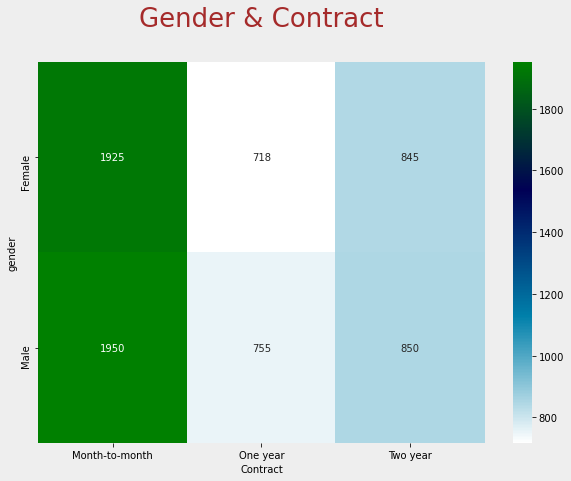

In [21]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(df.gender,df.Contract),annot=True,fmt="d",cmap="ocean_r")
plt.title('Gender & Contract\n ',fontsize=26,color='brown')

Ici nous observons que l'entrepise présente trois types de contrat à ses clients notamment: Month-to-month (pour une durée de validité de 1 mois par 1 mois), One-year (pour une durée de validité d'un an) et Two-years(pour une durée de validité de deux ans).
Parmis ces types de contrat nous constatons que 1950 clients (hommes) et 1925 clientes (femmes) ont signés le contrat de "Month-to-month", 718 clientes(femmes) et 755 clients (hommes) ont signés le contrat "one-year-Contract", 845 clientes (femmes) et 850 clients (hommes) ont signé le contrat "two years"

Text(0.5, 1.0, 'SeniorCitizen & PaymentMethod\n ')

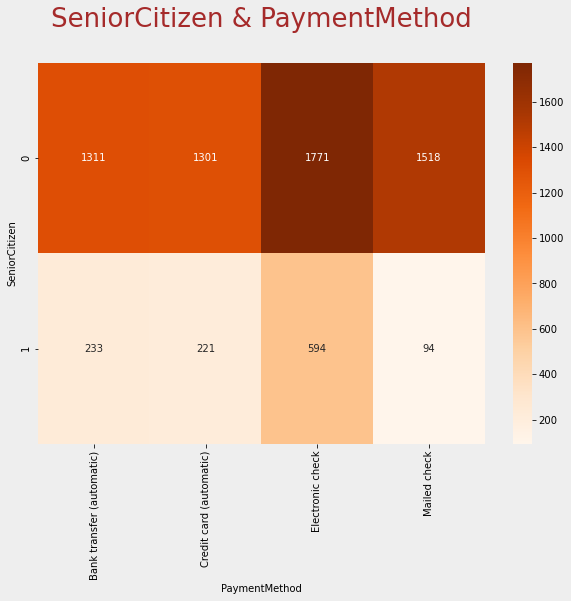

In [22]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(df.SeniorCitizen,df.PaymentMethod),annot=True,fmt="d",cmap="Oranges")
plt.title('SeniorCitizen & PaymentMethod\n ',fontsize=26,color='brown')

- Ici YES = 1 et NO = 0 pour l'attribut "SeniorCitizen"
- 233 clients de l'entreprise qui ont plus de 65 ans utilisent les "Bank tranfer (automatic) comme moyen de payment sur 1311 qui ont moins de 65 ans et qui l'utilisent.
- 221 clients de l'entreprise qui ont plus de 65 ans utilisent les "Credit card (automatic) comme moyen de payment sur 1301 qui ont moins de 65 ans et qui l'utilisent.
- 594 clients de l'entreprise qui ont plus de 65 ans utilisent les "Electronic check comme moyen de payment sur 1771 qui ont moins de 65 ans et qui l'utilisent comme moyen de payment aussi.
- 94 clients de l'entreprise qui ont plus de 65 ans utilisent les "Mailed check comme moyen de payment sur 1518 qui ont moins de 65 ans et qui l'utilisent comme moyen de payment aussi.

### Netoyage des données(Data preprocessing)

Ici nous aborderons le pre-processing de notre jeu de données avant la mise la place de la procédure d'apprentissage

### Etude des valeurs nulles

In [23]:
import missingno as mno
def showme_mno(df):
    return df.isna().sum()

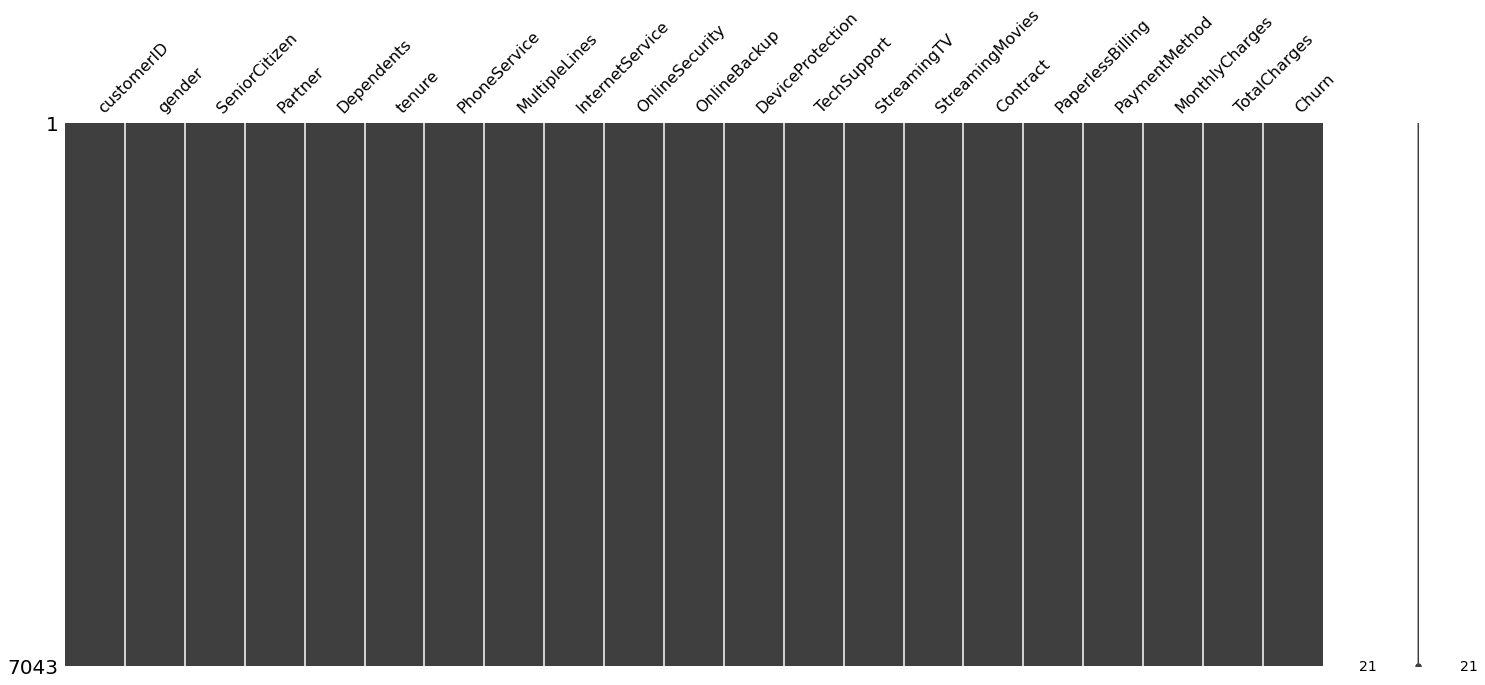

In [24]:
mno.matrix(df);

- Ici nous constatons qu'il n'y a pas de valeur de valeures nulles dans notre jeu de données

### Etude des valeurs manquantes ( Missing Values)

- Dans cette section nous traiterons les données manquantes

In [25]:
for col in df:
    print(f'{col :-<40} {df[col].unique()}')

customerID------------------------------ ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender---------------------------------- ['Female' 'Male']
SeniorCitizen--------------------------- [0 1]
Partner--------------------------------- ['Yes' 'No']
Dependents------------------------------ ['No' 'Yes']
tenure---------------------------------- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService---------------------------- ['No' 'Yes']
MultipleLines--------------------------- ['No phone service' 'No' 'Yes']
InternetService------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity-------------------------- ['No' 'Yes' 'No internet service']
OnlineBackup---------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection------------------------ ['No' '

- Aprés visualisation des valeurs distincts de notre dataset, nous constatons qu'il n'y a pas de valeurs manquantes (missing values)

### Feature selection

In [26]:
df.drop("customerID", axis=1, inplace=True)

In [27]:
# convertir la totalcharge en type float
df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric,errors='coerce') 

In [28]:
print(df.isnull().sum())
print('La somme des valeurs null: ', df.isnull().sum().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
La somme des valeurs null:  11


- ici nous constatons que l'attribut "TotalCharges" est stocké en tant que chaîne de caractères. Il y a 11 lignes stockées dans TotalCharges qui n'ont pas pu être converties en float et il s'avère qu'elles ont des valeurs manquantes. Nous avons décidé alors de changer ces 11 lignes en valeur moyenne de la colonne.

In [29]:
#remplacer les valeurs nulles par la moyenne de la colonne
TotalCharge_Mean = df.TotalCharges.mean()
df.TotalCharges = df.TotalCharges.fillna(TotalCharge_Mean)

In [30]:
#verifaction
print(df.isnull().sum())
print('La somme des valeurs null: ', df.isnull().sum().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
La somme des valeurs null:  0


- Ainsi il n'y a plus de valeurs nulles 

## Etude des valeurs abberantes

### Visualisation des outliers

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

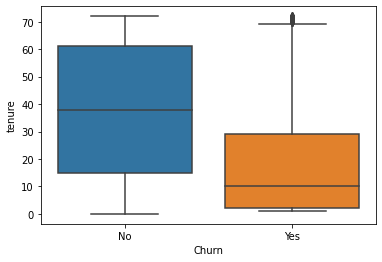

In [31]:
sns.boxplot(x='Churn',y='tenure', data=df)

- nous constatons une petite portion de valeur abberente avec un min_tenure de 0, une moyenne de 10 et un max de 70

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

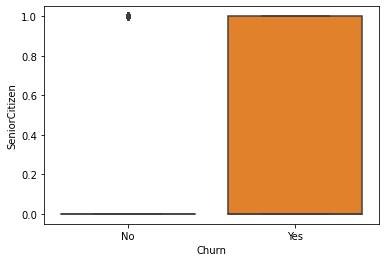

In [32]:
sns.boxplot(x='Churn',y='SeniorCitizen', data=df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

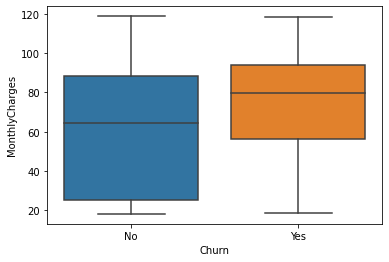

In [33]:
sns.boxplot(x='Churn',y='MonthlyCharges', data=df)

- Nous ne constattons pas de valeurs abberantes pour le Monthccharges

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

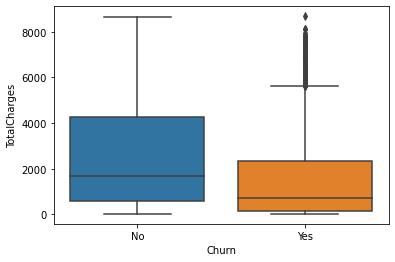

In [34]:
sns.boxplot(x='Churn',y='TotalCharges', data=df)

- Ici nous conctatons la presence de valeurs abberantes pour le totalCharges. 

### Traitement des valeurs abberantes

Nous avons implémenté la fonction find_all_outlier() qui permet de determiner les valeurs extremes (outliers), de recuperer et de les supprimer de notre jeu de données. Cette implmentation est basée sur le fonctionnement de diagramme à moustache qui graphiquement detecte les outliers .

In [35]:
def find_all_outlier(v):
    Q1 = np.quantile(v, 0.25)
    Q3 = np.quantile(v, 0.75)
    EIQ = Q3 - Q1
    LI = Q1 - (EIQ*1.5)
    LS = Q3 + (EIQ*1.5)
    i = list(v.index[(v < LI) | (v > LS)])
    val = list(v[i])
    return i, val

In [36]:
outliers_result = find_all_outlier(df['tenure'])
outliers_result1 = find_all_outlier(df['TotalCharges'])

A l'issue de l'applicationde notre methode nous pouvons dire que :
- nous ne contatons pas de valeurs abberantes dans notre jeu de données

## Encodage des données

Certaines features de notre dataset sont des variables categoricielles. Cependant, nous aborderons l'encodage des ces variables en des valeurs numériques pour preparer notre jeu de données avant de mettre en place notre modele d'apprentissage 

la fonction ci-dessous effectue l'encodage de nos variables cathegoricelles. En effet, elle recupère toutes les varibles cathegoricielles de notre dataset verifie s'ils sont des objets si c'est le cas nous convertissons le type puis l'encoder.
On ne conserve que la variable cible (Churn) en une variables cathegorielle(No,YES) .

In [37]:
columCategory = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in columCategory:
    if(df[col].dtype == 'object'):
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
        
# On conserve Class/ASD comme variable categorielle
df['Churn'] = df['Churn'].replace([0,1],['NO','YES'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


- Maintenant que notre jeu de données est propre, nous pouvons passer à la résolution du probleme d'imbalanced data

## Apprentissage du modele predictif

### découpage du jeu de données

In [38]:
X =df.drop(['Churn'], axis=1).values
Y = df['Churn'].values

## Imbalanced Data

Dans l'exploration des données effectué au dessus, nous avions mentionné que  dans la variable cible nous avons une disproportion importante de valeurs entre les clients qui ont quitté l'entreprise représentés par "YES" soit 5174 clients (73.46%) et ceux qui ont décidé de rester dans l'entreprise notés "NON" soit 1869 clients (26.53%).Nous avions noté ainsi une difference de proportion de 3305 clients soit 46,92 % du total des clients de l'entreprise.Cette disproportion crée un deséquilibre entre les valeurs de la classe cible.Ceci produit un problème communément connu sous le nom de Imbalanced Data qui pourrait impacter (biaiser) notre modele qui pourrait tendance à prédire plus pour la classe majoritaire.Pour resoudre ce problème, nous adopterons deux techniques differentes que nous etudierons plus tard.

### Oversampling (enriching the minority classes)

- Cette methode consiste à enrichir la classe minoritaire(dans notre cas: la classe "NO") en augmentant le nombre d’observations de la (des) classe(s) minoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

In [39]:
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)

### methode: Random oversampling

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
# Sur-échantillonnage
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, Y_train)

### Standardisation des données

 - la standardisation consiste à normaliser les données c'est à dire rendre les valeurs des attributs dans les memes echelles de grandeur.

In [44]:
#creation de standardiseur
scaler = StandardScaler()

In [45]:
X_ro_scaled = scaler.fit_transform(X_ro)

In [46]:
X_ro_scaled

array([[ 0.99460289, -0.50156986, -0.89248405, ..., -0.62475468,
         1.43696806,  2.31084772],
       [ 0.99460289, -0.50156986, -0.89248405, ...,  1.3577542 ,
        -0.10796824, -0.29652305],
       [ 0.99460289,  1.9937402 , -0.89248405, ...,  0.36649976,
         1.1293556 ,  1.6056464 ],
       ...,
       [ 0.99460289, -0.50156986, -0.89248405, ...,  1.3577542 ,
        -1.66493407, -0.93924627],
       [ 0.99460289, -0.50156986,  1.1204682 , ...,  0.36649976,
         0.66020365,  1.75393203],
       [-1.0054264 , -0.50156986,  1.1204682 , ...,  0.36649976,
         0.89048336, -0.39328764]])

In [47]:
X_test_scalled = scaler.transform(X_test)

## Application de l'algorithme K-NN 

L'algorithme des k plus proches voisins (KNN) est un algorithme de machine learning qui appartient à la classe des algorithmes supervisés. En effet, c'est un algorithme très utilisé avec les problèmes de classification et de regression.\

#### Methode de la validation croisée

- La validation croisée est une strategie qui permet d'entrainer un modele de machine learning basée sur une méthode d’estimation de fiabilité d’un modèle fondé sur une technique d’échantillonnage.Nous appliquons cette methodologie car elle nous permet d'avoir des modeles plus performant en choisissant les meilleurs hyperparametres de notre modele à l'issue de l'apprentissage   sur un ensemble de valeurs definies.

In [48]:
#definition des hyper-parametres 
p_k = [1, 5, 10, 15, 20, 25]

In [49]:
#Construire  k=5 sous ensemble
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25],
             'metric' : ['euclidean', 'manhattan']}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [50]:
from sklearn import model_selection
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [51]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_ro_scaled, y_ro)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [52]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'euclidean', 'n_neighbors': 1}


In [53]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.868 (+/-0.048) for {'metric': 'euclidean', 'n_neighbors': 1}
accuracy = 0.770 (+/-0.042) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.756 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.753 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.755 (+/-0.028) for {'metric': 'euclidean', 'n_neighbors': 20}
accuracy = 0.753 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 25}
accuracy = 0.868 (+/-0.046) for {'metric': 'manhattan', 'n_neighbors': 1}
accuracy = 0.774 (+/-0.027) for {'metric': 'manhattan', 'n_neighbors': 5}
accuracy = 0.770 (+/-0.023) for {'metric': 'manhattan', 'n_neighbors': 10}
accuracy = 0.755 (+/-0.023) for {'metric': 'manhattan', 'n_neighbors': 15}
accuracy = 0.757 (+/-0.024) for {'metric': 'manhattan', 'n_neighbors': 20}
accuracy = 0.757 (+/-0.016) for {'metric': 'manhattan', 'n_neighbors': 25}


La meilleure performance (~0.868) est ici atteinte avec 1 voisins.

Concernant l'apprentissage et la selection du meilleure valeur de k, nous avons utilisé la methode d'optimisation GridSearchCV de sklearn. L'ensemble d'entrainement est divisé en 5 echantillons qui vont servir à tour de role le jeu de validation lors de l'apprentissage.En appliquant également la technique RandomOversampling, nous avons obtenu les resultats ci dessus :

Nous avons obtenu le meilleur modele avec la valeur de k=1.
une precision globale de 86.8% sur le jeu d'entrainement

In [55]:
#la performance sur le jeu de test
y_pred_test = clf.predict(X_test_scalled)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(Y_test, y_pred_test)))


Sur le jeu de test : 0.706


En regardant les performances sur le jeu de données test, on constate que le modèle offre une precision de 70.6% sur le jeu de données Teste, plus ou moins proche de la performance obtenue lors de l'apprentissage du modele (86.8%).


In [81]:
best_model1 = clf.best_estimator_

In [82]:
New_Y_test_pred = best_model1.predict(X_test_scalled)

In [83]:
print(classification_report(Y_test, New_Y_test_pred))

              precision    recall  f1-score   support

          No       0.80      0.79      0.80      2587
         Yes       0.45      0.47      0.46       935

    accuracy                           0.71      3522
   macro avg       0.63      0.63      0.63      3522
weighted avg       0.71      0.71      0.71      3522



### Visualisation des limites de décision du classificateur k-NN

In [84]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

C:\Users\cheri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


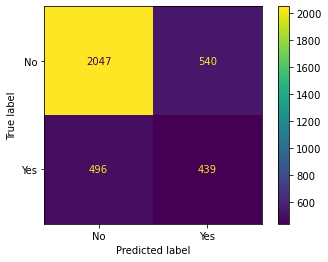

In [85]:
plot_confusion_matrix(best_model1, X_test_scalled, Y_test)

Avec la methode Random OverSampling, En visualisant notre classifcation report et notre matrix de confusion, nous constatons que notre modèle présente des resultats satisfaisantes.En effet, les performances du modèle sur le jeu de données test donne de bons resultats sur la précision (80%), le rappel(79%) et f1-score(80%).
Ce qui témoigne une bonne capacité de généralisation du modèle sur des données a teste aussi bien dans la classe majoritaire comme minoritaire.Nous pouvons dire que le RandomOversampling est assez efficaces sur nos données.

# Deuxième Methode 

### Undersampling (reducing the majority classes)

Les méthodes d’Undersampling fonctionnent en diminuant le nombre d’observations de la  (des) classe(s) majoritaire(s) afin d’arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant. 

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [56]:
# Sous-échantillonnage
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, Y_train)

### Standardisation des données

In [63]:
#creation de standardiseur
scaler2 = StandardScaler()

In [64]:
X_ru_scaled = scaler2.fit_transform(X_ru)

In [65]:
X_ru_scaled

array([[-1.00429187, -0.50618236,  1.11226155, ..., -0.63446642,
         0.58034216,  1.70113554],
       [ 0.99572648, -0.50618236,  1.11226155, ..., -0.63446642,
        -0.24073083,  0.49429858],
       [ 0.99572648, -0.50618236,  1.11226155, ..., -1.62542233,
        -1.6303711 , -0.78160754],
       ...,
       [ 0.99572648, -0.50618236, -0.89906911, ...,  0.35648949,
         0.65420438, -0.64197522],
       [-1.00429187, -0.50618236, -0.89906911, ..., -0.63446642,
         0.57518899,  0.56005793],
       [ 0.99572648,  1.97557261,  1.11226155, ...,  0.35648949,
         0.57003581,  0.44839805]])

In [76]:
X_test_scalled2 = scaler2.transform(X_test)

## Application de l'algorithme K-NN

#### Methode de la validation croisée

In [67]:
#definition des hyper-parametres 
p_k = [1, 5, 10, 15, 20, 25]

In [68]:
#Construire  k=5 sous ensemble
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25],
             'metric' : ['euclidean', 'manhattan']}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [69]:
from sklearn import model_selection
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf2 = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [77]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf2.fit(X_ru_scaled, y_ru)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [78]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf2.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'manhattan', 'n_neighbors': 10}


In [79]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf2.cv_results_['mean_test_score'], # score moyen
        clf2.cv_results_['std_test_score'],  # écart-type du score
        clf2.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.669 (+/-0.036) for {'metric': 'euclidean', 'n_neighbors': 1}
accuracy = 0.711 (+/-0.047) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.737 (+/-0.037) for {'metric': 'euclidean', 'n_neighbors': 10}
accuracy = 0.729 (+/-0.050) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.742 (+/-0.037) for {'metric': 'euclidean', 'n_neighbors': 20}
accuracy = 0.739 (+/-0.047) for {'metric': 'euclidean', 'n_neighbors': 25}
accuracy = 0.678 (+/-0.032) for {'metric': 'manhattan', 'n_neighbors': 1}
accuracy = 0.735 (+/-0.043) for {'metric': 'manhattan', 'n_neighbors': 5}
accuracy = 0.744 (+/-0.047) for {'metric': 'manhattan', 'n_neighbors': 10}
accuracy = 0.735 (+/-0.038) for {'metric': 'manhattan', 'n_neighbors': 15}
accuracy = 0.744 (+/-0.032) for {'metric': 'manhattan', 'n_neighbors': 20}
accuracy = 0.744 (+/-0.032) for {'metric': 'manhattan', 'n_neighbors': 25}


La meilleure performance (~0.744) est ici atteinte avec 10 voisins.

Concernant l'apprentissage et la selection du meilleure valeur de k, nous avons utilisé la methode d'optimisation GridSearchCV de sklearn. L'ensemble d'entrainement est divisé en 5 echantillons qui vont servir à tour de role le jeu de validation lors de l'apprentissage.En appliquant également la technique RandomUndersampling cette fois ci, nous avons obtenu les resultats ci dessus :

Nous avons obtenu le meilleur modele avec la valeur de k=10.
une precision globale de 74.4% sur le jeu d'entrainement

In [80]:
#la performance sur le jeu de test
y_pred_test2 = clf2.predict(X_test_scalled2)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(Y_test, y_pred_test2)))


Sur le jeu de test : 0.701


En regardant les performances sur le jeu de données test, on constate que le modele offre une precision de 70.1% sur le jeu de données Teste, fifferent de la performance obtenue lors de l'apprentissage du modele (74.4%).

In [86]:
best_model2 = clf2.best_estimator_

In [87]:
New_Y_test_pred2 = best_model2.predict(X_test_scalled2)

In [88]:
print(classification_report(Y_test, New_Y_test_pred2))

              precision    recall  f1-score   support

          No       0.90      0.67      0.77      2587
         Yes       0.46      0.79      0.58       935

    accuracy                           0.70      3522
   macro avg       0.68      0.73      0.68      3522
weighted avg       0.78      0.70      0.72      3522



C:\Users\cheri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


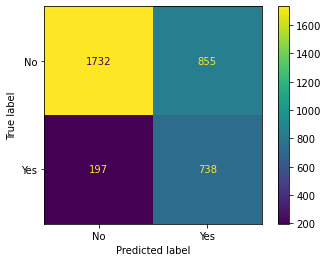

In [89]:
plot_confusion_matrix(best_model2, X_test_scalled2, Y_test)

Avec la methode Random UnderSampling, En visualisant notre classifcation report et notre matrix de confusion, nous constatons que notre modèle présente des resultats satisfaisants mais bon que celle de l'OverSampling .En effet, les performances du modèle sur le jeu de données test un score de 70.1% sensiblement egale à celui de RandomOverSampling (70.6%).Par contre nous notons une grande différence de performance dans les jeu de données d'apprentissage soit 74.4% pour UnderSampling et 86.88% pour le OverSampling.
les resultats sur la précision (80%), le rappel(79%) et f1-score(80%) pour la methode OverSampling est sensiblement superieur à ceux obtenus avec UnderSampling précision (90%), le rappel (67%) le f1-score(77) . 
Ainsi, d'apres nos resultats à l'issu des deux strategies, nous pouvont dire que les deux methode appliquées sur le meme algorithme presente des resultats trés proches avec plus de performances pour la methode RandomOverSampling.
Ce qui témoigne une bonne capacité de généralisation des modèles sur des données a teste aussi bien dans la classe majoritaire comme minoritaire.Nous pouvons dire que le RandomOversampling est sensiblement plus efficaces sur nos données.